# Basic statistics
Python activities to complement *Measurements and their Uncertainties*, Chapter 2, "Random errors in measurements."

Author: J. S. Dodge, 2019©

* [Preliminaries](#Preliminaries)
* [Basic statistics with NumPy](#Basic-statistics-with-NumPy)
    * [Location and width](#Location-and-width)
        * [Programming notes 1](#Programming-notes-1)
        * [Programming notes 2](#Programming-notes-2)
    * [Exercise 1](#Exercise-1)
* [Parent distributions](#Parent-distributions)
    * [The parent distribution for `rand`](#The-parent-distribution-for-rand)
* [The normal distribution](#The-normal-distribution)
    * [Sampling the standard normal distribution with `randn`](#Sampling-the-standard-normal-distribution-with-randn)
* [The standard error](#The-standard-error)
    * [The mean of a random sample is also random](#The-mean-of-a-random-sample-is-also-random)
* [Reporting results](#Reporting-results)
    * [Formatting numbers in Python](#Formatting-numbers-in-Python)
* [Summary](#Summary)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](1.0-Random-numbers.ipynb) and read Chapter 2, "Random errors in measurements," of *Measurements and their Uncertainties*, with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Random_error_in_measurements) in mind.

1. Be able to use the mean and standard deviation to characterize a statistical sample. Specifically, be able to:
    1. Estimate the mean and standard deviation from a histogram;
    2. Sketch a distribution with a given mean and standard deviation;
    3. Calculate the mean for a set of measurements;
    4. Calculate the standard deviation for a set of measurements.
2. Know the functional form for a Gaussian distribution, be able to sketch it for a given mean and standard deviation, and be able to estimate the mean and standard deviation from the plot of a Gaussian distribution.
3. Be able to discuss the relationships between a sample and its parent distribution.
4. Be able to discuss the difference between the standard deviation and the standard deviation in the mean (aka the standard error), and be able to estimate both from a histogram of measurements.
5. Be able to report uncertainties correctly for a given measurement.

You already know how to import libraries and tell the Jupyter notebook server how to display plots from Matplotlib, so we will get this out of the way now in the following code cell.

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

%matplotlib inline

## Basic statistics with NumPy

###  Location and width
NumPy includes several basic [statistics routines](https://numpy.org/devdocs/reference/routines.statistics.html) for characterizing a sample from a statistical distribution. The following code cell applies several of them to the results in Table 2.1 of *Measurements and their Uncertainties*. The most common ones, the mean and the standard deviation, provide estimates of the *location* and *width*, respectively, of the underlying distribution.

#### Programming notes 1
In both the [`std`](https://numpy.org/devdocs/reference/generated/numpy.std.html) and the [`var`](https://numpy.org/devdocs/reference/generated/numpy.var.html) functions it is important to set the option `ddof=1` for consistency with Eq. (2.3) in *Measurements and their Uncertainties*. The documentation for both functions describes this option as follows.
> “Delta Degrees of Freedom”: the divisor used in the calculation is `N - ddof`, where `N` represents the number of elements. By default `ddof` is zero.

What this means is that the default usage of `std` with `ddof=0` returns
$$\sigma_N = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i - \bar{x})^2}\quad\text{(Default, ddof=0)},$$
and with `ddof=1` it returns the expression given in Eq. (2.3),
$$\sigma_{N-1} = \sqrt{\frac{1}{N-1}\sum_{i=1}^N(x_i - \bar{x})^2}\quad\text{(Preferred, ddof=1)}.$$

The options `ddof=0` and `ddof=1` are also called *uncorrected* and *corrected*, respectively, for reasons that we will discuss shortly.

Both options are shown below, and you will notice that the difference is not that large. Since we will normally only need to know the standard deviation to one significant figure anyway, the downside risk of forgetting to set `ddof=1` is usually not that bad, although conceptually they are used quite differently.

And just to be sure that `mean` and `std` are doing what we think they are doing, we use the NumPy [`sum`](https://numpy.org/devdocs/reference/generated/numpy.sum.html) function and the built-in Python [`len`](https://docs.python.org/3/library/functions.html#len) function to evaluate them explicitly. These expressions are long, so we use the backslash (`\`) character to break them and continue (with indentation) on the next line.

In [56]:
period = [10.0, 9.4, 9.8, 9.6, 10.5, 9.8, 10.3, 10.2, 10.4, 9.3]
print("Mean: ", np.mean(period))
print("Mean (explicit): ", np.sum(period)/len(period))
print("Median: ", np.median(period))
print()
print("Standard deviation (uncorrected): ", np.std(period))
print("Standard deviation (uncorrected, explicit): ", \
      np.sqrt(np.sum((period - np.mean(period))**2)/len(period)))
print("Variance (uncorrected): ", np.var(period))
print("Standard deviation (corrected): ", np.std(period, ddof=1))
print("Standard deviation (corrected, explicit): ", \
      np.sqrt(np.sum((period - np.mean(period))**2)/(len(period)-1)))
print("Variance (corrected): ", np.var(period, ddof=1))
print()
print("Minimum: ", np.amin(period))
print("Maximum: ", np.amax(period))
print("Range (peak-to-peak): ", np.ptp(period))

Mean:  9.93
Mean (explicit):  9.93
Median:  9.9

Standard deviation (uncorrected):  0.3976179070414207
Standard deviation (uncorrected, explicit):  0.3976179070414207
Variance (uncorrected):  0.15809999999999988
Standard deviation (corrected):  0.419126074906664
Standard deviation (corrected, explicit):  0.419126074906664
Variance (corrected):  0.17566666666666653

Minimum:  9.3
Maximum:  10.5
Range (peak-to-peak):  1.1999999999999993


#### Programming notes 2
The last result in the above cell looks worrisome: shouldn't we get 10.5 – 9.3 = 1.2? But it turns out that this is [just what we expect](https://docs.python.org/3/tutorial/floatingpoint.html), once we recognize that the computer uses a  binary representation of floating-point numbers that has finite precision. To see this, we calculate 10.5 – 9.3 – 1.2 in a few different ways.

In [32]:
print(10.5 - 9.3 - 1.2)
print((10.5 - 9.3) - 1.2)
print(10.5 - (9.3 + 1.2))

-6.661338147750939e-16
-6.661338147750939e-16
0.0


Most computers have 53 bits of floating-point precision, so the best we can expect for any number is a relative precision of 2<sup>-53</sup>. In this calculation,  10.5 has an exact binary representation, but 9.3 and 1.2 are both infinitely repeating fractions that must be truncated. These errors cancel in the last of the three calculations, but not in the first two (which are equivalent, given Python's order-of-operations rules). The cell below shows that the magnitude of overall truncation error is exactly $6\times 2^{-53}$.

In [52]:
print(2**(-53))
print(10.5 - 9.3 - 1.2 + 6*2**(-53))

1.1102230246251565e-16
0.0


Very few experiments ever approach this level of precision, of course. The only reason this came up in our simple  calculation is because numbers are expressed by default with excessive precision—later we will see how to format numerical expressions to the correct precision in Python.

### Exercise 1
Problem (2.1) of *Measurements and their uncertainties* gives a set of volume measurements, all in milliliters: 25.8, 26.2,  26.0, 26.5, 25.8, 26.1, 25.8, and 26.3. Use NumPy to calculate the mean, the standard deviation $\sigma_{N-1}$, and the total range of the data.

In [57]:
# Use this cell for your response, adding cells if necessary.

## Parent distributions

Section 2.6 of *Measurements and their uncertainties* introduces the concepts of a *sample* and a *parent distribution*, fundamental concepts in statistics that allows us to connect *what we actually measure* (the sample) to a *mathematical model for the measurement* (the parent distribution). A canonical example that illustrates this difference is a coin flip. Before we flip the coin, we *expect* it to come up "Heads" or "Tails" with equal probability: our parent distribution is then
$$ P(x) = \begin{cases}
  \frac{1}{2} & \text{for}\ x =\ \text{"Heads", and} \\
    \frac{1}{2} & \text{for}\ x =\ \text{"Tails,"}
  \end{cases} $$
where $P(x)$ denotes the probability of obtaining a result $x$. When we actually flip a coin, however, the result is always *either* "Heads" or "Tails," and it no longer makes sense to describe this probabilistically. The result is a *sample* that has been *drawn* from the parent distribution.

Now that we have defined these two concepts, we can identify some of the most important goals of statistics:
1. Determine the properties of a parent distribution from knowledge of a sample drawn from it,
2. Determine the properties of a sample from knowledge of the parent distribution, and
3. Determine the probability that a given sample was drawn from a given parent distribution.

In the context of experimental physics, this translates into
1. Developing a mathematical model to describe a set of experimental measurements,
2. Predicting the results of an experiment using a mathematical model,
3. Assessing the agreement between a mathematical model and an experiment.

It is not an exaggeration to say that most of science can be reduced to these three activities.

### The parent distribution for `rand`
Let's start with the first item: determining the parent distribution of `rand` from the samples that it generates. This is a bit artificial since we know that `rand` was *designed* with a particular parent distribution in mind, but it serves as an example of how we would proceed if the underlying parent distribution were unknown.

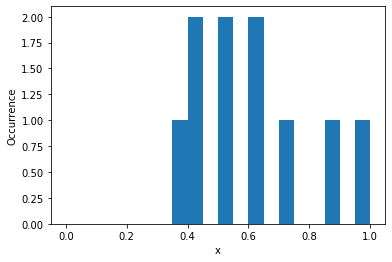

In [91]:
n = 10
random.seed(0)
x_rand = random.rand(n)

plt.hist(x_rand,bins=20,range=(0.0,1.0))
plt.xlabel('x')
plt.ylabel('Occurrence');

### Sampling from a general uniform distribution

## The normal distribution

### Sampling the standard normal distribution with `randn`

### Sampling from general normal distribution

## The standard error

###  The mean of a random sample is also random

## Reporting results

### Formatting numbers in Python

## Summary
Here is a list of what you should be able to do after completing this notebook.
* Compute basic statistics on a set of numbers using NumPy, including `mean`, `median`, `std`, `var`, `amin`, `amax`, and `ptp`.
* Recognize the significance of the `ddof` option in `std` and `var` and use it appropriately.
* Use `sum` and `len` from NumPy and the Python standard library, respectively, to compute the standard deviation and variance of a set of numbers without using `std` or `var`.
* Describe the limitations of floating-point calculations and be able to recognize them when you encounter them.
* Express the parent distributions for `rand` and `randn` in mathematical notation.
* Use `rand` and `randn` to generate samples from general uniform and general normal distributions, respectively.
* Compute the standard error for a set of measurements.
* Format numerical expressions in Python.

## 2.1 Analysing distributions: some statistical ideas

Reproduce Fig. 2.1 using the randn and histogram functions, discussed in the notes for Ch. 2. Judging from Fig. 2.1(d), the distribution has mean $\bar{x} = x_0 = 10$  and standard deviation $\sigma = 1$ . 

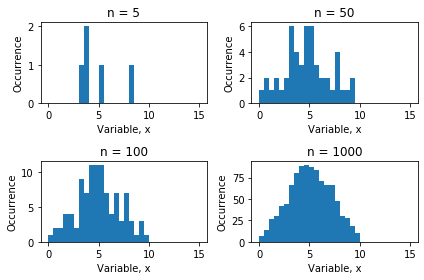

In [2]:
# import numpy library and name it "np".
import numpy as np
# import matplotlib.pyplot and name it "plt"
import matplotlib.pyplot as plt

# initialize a pseudorandom number generator
np.random.seed(1)

n_0 = 5
n_1 = 50
n_2 = 100
n_3 = 1000


x_0 = 10
sigma = 1


# generate all 1000 points at once
#x_simulation = np.random.randn(n_3) * sigma + x_0
x_simulation = 5*(np.random.rand(n_3) + np.random.rand(n_3))

plt.subplot(2, 2, 1)
plt.hist(x_simulation[:n_0], range=(0, x_0 * 1.5), bins=30)
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')
plt.title('n = 5')

plt.subplot(2, 2, 2)
plt.hist(x_simulation[:n_1], range=(0, x_0 * 1.5), bins=30)
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')
plt.title('n = 50')
plt.subplot(2, 2, 3)
plt.hist(x_simulation[:n_2], range=(0, x_0 * 1.5), bins=30)
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')
plt.title('n = 100')
plt.subplot(2, 2, 4)
plt.hist(x_simulation[:n_3], range=(0, x_0 * 1.5), bins=30)
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')
plt.title('n = 1000')


# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()




## 2.2 The mean

The numpy function [mean](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.mean.html) computes the mean value of an array. Remember that we set $\bar{x} = 10$ at the beginning.

In [3]:
xbar =np.mean(x_simulation)
print(xbar)

10.038812476159602


Compare this with Eq. (2.1) in Hughes and Hase. It's always a good idea to check that functions are calculating what you think they are!

In [4]:
print(np.sum(x_simulation)/len(x_simulation))

10.038812476159602


## 2.3 The width of the distribution: estimating the precision
Consider the data in Table 2.1:


In [5]:
t = np.array([10.0, 9.4, 9.8, 9.6, 10.5, 9.8, 10.3, 10.2, 10.4, 9.3])

### Todo:
Plot a histogram of the data. Let Python choose the bins automatically. Make sure you x and y axes are labeled correctly. 

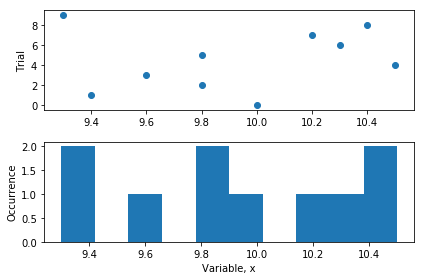

In [6]:
plt.subplot(2, 1, 1)
plt.scatter(t, range(len(t)))
plt.ylabel('Trial')




plt.subplot(2, 1, 2)
# your code goes here
plt.hist(t)


plt.ylabel('Occurrence')
plt.xlabel('Variable, x')

# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()

Try to use six bins. 

In [7]:
# your code goes here 

Display the mean with a vertical line on your histogram plot.

In [8]:
# your code goes here
t_mean = np.mean(t)

print(t_mean)

9.93


## 2.3.1 Rough-and-ready approach to estimating the width

To find the full range of the data, use the functions np.max() and np.min().

In [9]:
t_max = np.max(t)
t_min = np.min(t)

d_max = abs(t_mean - np.array([t_min, t_max])) 

print(d_max)

[0.63 0.57]


The total spread of the data is (9.9 ± 0.6) s, as given in Hughes and Hase (note the significant figures). The 'rough-and-ready' method to estimating the spread gives:

In [10]:
sigmaRough = (2/3) * np.max(d_max)
print(sigmaRough)

0.4199999999999993


Compare this to the standard deviation, using the Python function [np.std(x, ddof=1)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html). Do we need to talk about Delta Degrees of Freedom (ddof)?>>>

**Note:** When we set the flag ddof=1 it mean that np.std() is measuring $\sigma_{N-1}$;
$$\sigma_{N-1} = \sqrt{\frac{1}{N-1}\Sigma^{N}_{i=1}d^2_i} $$.
The default value for this flag is ddof=0 which corresponds to $\sigma_{N}$ (This concept is discussed in Chapter 8.). 

In [11]:
sigma = np.std(t, ddof=1)
print(sigma)

0.419126074906664


Check that this agrees with (2.3).

In [12]:
# your code goes here

The 'rough-and-ready' estimate is only useful for small sample sizes, and even then it's probably better just to calculate the standard deviation. The estimate gets worse as the sample size increases.

In [13]:
# number of data points
n_sample = np.array([3, 10, 30, 100, 300, 1000])
rough_width = np.zeros(len(n_sample))
std_dev = np.zeros(len(n_sample))


# generate  all 1000 random numbers
all_samples = np.random.randn(n_sample[-1])

# iterate on values in n_sample
for ind, i_sample in enumerate(n_sample):
    # make the current sample based on the current value in n_sample
    sample = all_samples[:i_sample]
    # calculate d_max for the current sample (as of before)
    d_max = abs(np.mean(sample) - np.array([np.max(sample), np.min(sample)]))
    # measure rough width for the current d_max and store  it in rough_width using the current index(ind) value
    rough_width[ind] = (2/3) * max(d_max)
    # measure the standard deviation for the current sample and store it in std_dev using the current index(ind) value
    std_dev[ind] = np.std(sample, ddof=1)
    
    # print the values of interest 
    print('N = ', i_sample)
    print('Rough method: ', rough_width[ind])
    print('Standard dev:', std_dev[ind])
    print('-----')


N =  3
Rough method:  1.1599478222538917
Standard dev: 1.5426596726396025
-----
N =  10
Rough method:  1.424073427068594
Standard dev: 1.1641041070926035
-----
N =  30
Rough method:  1.5046180015907062
Standard dev: 1.1126146825503953
-----
N =  100
Rough method:  1.68670296168098
Standard dev: 1.061574538144738
-----
N =  300
Rough method:  1.9230764451030566
Standard dev: 0.986598190563191
-----
N =  1000
Rough method:  2.270225325600654
Standard dev: 1.03055283351727
-----


## 2.4 Continuous distributions

To reproduce Fig. 2.3, use the RNG to make 10,000 normally distributed numbers with the same mean and standard deviation as we used to reproduce Fig. 2.1.

In [14]:
x0 = 10
sigma = 1
nSample = 10000

x = x0 + sigma * np.random.randn(nSample)

The bins in Fig. 2.3(a) are 1.6 wide; the width decreases by a factor of two in each successive histogram. Use a loop to generate the four plots, using a character array to produce the different labels. To superpose the normal distribution on each plot, use the Nunmpy function [linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to make an array xVar, and use (2.4); normalize to match the maximum of the histogram.

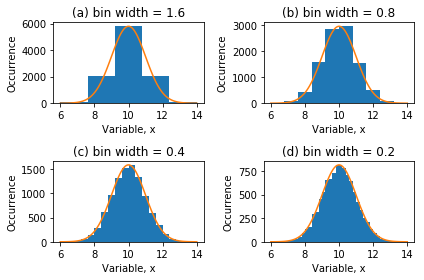

In [15]:
bin_start = 6
bin_end = 14

x_var = np.linspace(start=bin_start, stop=bin_end, num=100)
f = (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(-((x_var - x0)**2 / (2*sigma**2)))

bin_width = [1.6, 0.8, 0.4, 0.2]
label_array = 'abcd'

for i_plot in range(4):
    # make a new subplot 
    plt.subplot(2, 2, i_plot+1)
    # plot the histogram and save the values of each bin in h_max --> for more information go to "Python exercise for Chapter 2.ipynbe"
    h_values, _, _ = plt.hist(x, bins=np.arange(bin_start, bin_end + bin_width[i_plot], bin_width[i_plot]))

    plt.plot(x_var, f * np.max(h_values) * np.sqrt(2*np.pi)*sigma)
    
    
    plt.ylabel('Occurrence')
    plt.xlabel('Variable, x')
    plt.title("({}) bin width = {}".format(label_array[i_plot], bin_width[i_plot]))
    
# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()
    

## 2.5 The normal distribution

Reproduce Fig. 2.4. Define an anonymous function for (2.4) to simplify the computation of the three distributions. Note the LaTeX markup for the legend.

In [16]:
def f(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(-((x - mu)**2 / (2*sigma**2)))


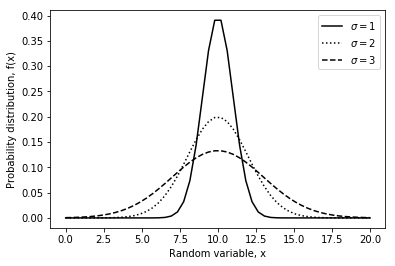

In [17]:
# define the x values
x_var = np.linspace(0, 20)
# plot f(x, mu, sigma) for specific values of mu = 10 and sigma = 1, 2, 3
plt.plot(x_var, f(x_var, 10, 1), 'k-', x_var, f(x_var, 10, 2), 'k:', x_var, f(x_var, 10, 3), 'k--')

plt.ylabel('Probability distribution, f(x)')
plt.xlabel('Random variable, x')
plt.gca().legend(('$\sigma = 1$', '$\sigma = 2$', '$\sigma = 3$'))

## 2.6 Sample and parent distribution

As we mentioned before, np.std(x, ddof=1) computes the sample standard divination using (2.6), but ddof flag accepts an optional parameter (ddof=0) that causes it to use (2.7) instead.

In [18]:
sample_parent = np.std(t)
print(sample_parent)

0.3976179070414207


Check that this agrees with (2.5).

In [19]:
sample_parent_alt = np.sqrt(np.sum((t-np.mean(t))**2)/len(t))
print(sample_parent_alt)

0.3976179070414207


The sample standard deviation from Sec. 2.3.2 is a bit bigger.

In [20]:
print(np.std(t, ddof=1))

0.419126074906664


We can use the RNG to compare (2.5) and (2.6). Make a 5 x 1000 array of normally distributed random numbers, and compute both versions of the standard deviation for each of the 10000 columns (with $N =5$ ).

In [21]:
# generate 5 sets of random data
data = np.random.randn(5, 1000)
std_sample = np.std(data, axis=1, ddof=1)
print(std_sample)

[0.98888637 1.00814532 1.01246337 0.99902762 0.98680601]


## 2.7 The standard error
The sample standard deviation is an estimate of the distribution width. The standard *error* $\alpha$  estimates how well we know its mean value. If $N = 1$, then $\alpha = \sigma$, but our knowledge of $\mu$ improves with every new measurement, as Fig. 2.1 shows.
Return to the data in Table 2.1. For these ten measurements, we can estimate the mean of the parent distribution to be (9.9 ± 0.1) s.

In [22]:
print(t_mean)
t_std_err = np.std(t, ddof=1)/np.sqrt(len(t))
print(t_std_err)

9.93
0.13253930234714023


Confirm (2.7) for the 5 x 1000 random numbers in the array data: take the mean of each column, then find the standard deviation of the mean.

In [23]:
data_mean = np.mean(data, axis=0)
data_mean_unc = np.std(data_mean, ddof=1)
data_std = np.std(data, ddof=1, axis=0)

print(data_mean_unc)
print(np.mean(data_std) / np.sqrt(5))


0.4541729592121779
0.41853618826134575


### 2.7.1 The error in the error
For the data in Table 2.1, the fractional error in the error is 20% (to one significant figure).

In [24]:
print(1/np.sqrt(2*len(t) - 2))

0.23570226039551587


Confirm (2.8) for the 5 x 1000 random numbers in the array data: take the standard deviation of each column, then find the standard deviation of the standard deviation.

In [55]:
data_std_unc = np.std(data_std, ddof=1)
print(data_std_unc)
print(np.mean(data_std)/np.sqrt(2*5 - 2))

0.33726493856707623
0.3308819095277202


## Exercises
Please complete these exercises listed below in the worksheet. After you have finished the worksheet and the exercises, save the worksheet as a .pdf file and upload to Canvas.

1. Exercise (2.3)
A measurement of 100 minutes will reduce the random error by a factor of 10.

2. Exercise (2.5)

3. 3 - Describing your data
(a) Load the data set DataBarlowProb2_6.txt. 
(b) Show the data in a histogram, choosing a reasonable bin size.
(c) Calculate the mean and standard deviation of the data set, specifying which version of the standard deviation you have used.
(d) What is the uncertainty in any given data point?
(e) Generate a data set with the mean that you calculated in Part (c) and the same number of data points but a standard deviation that is twice as large, and add it to your histogram.